[0.         0.00800801 0.01601602 0.02402402 0.03203203 0.04004004
 0.04804805 0.05605606 0.06406406 0.07207207 0.08008008 0.08808809
 0.0960961  0.1041041  0.11211211 0.12012012 0.12812813 0.13613614
 0.14414414 0.15215215 0.16016016 0.16816817 0.17617618 0.18418418
 0.19219219 0.2002002  0.20820821 0.21621622 0.22422422 0.23223223
 0.24024024 0.24824825 0.25625626 0.26426426 0.27227227 0.28028028
 0.28828829 0.2962963  0.3043043  0.31231231 0.32032032 0.32832833
 0.33633634 0.34434434 0.35235235 0.36036036 0.36836837 0.37637638
 0.38438438 0.39239239 0.4004004  0.40840841 0.41641642 0.42442442
 0.43243243 0.44044044 0.44844845 0.45645646 0.46446446 0.47247247
 0.48048048 0.48848849 0.4964965  0.5045045  0.51251251 0.52052052
 0.52852853 0.53653654 0.54454454 0.55255255 0.56056056 0.56856857
 0.57657658 0.58458458 0.59259259 0.6006006  0.60860861 0.61661662
 0.62462462 0.63263263 0.64064064 0.64864865 0.65665666 0.66466466
 0.67267267 0.68068068 0.68868869 0.6966967  0.7047047  0.7127

1


No handles with labels found to put in legend.


nan


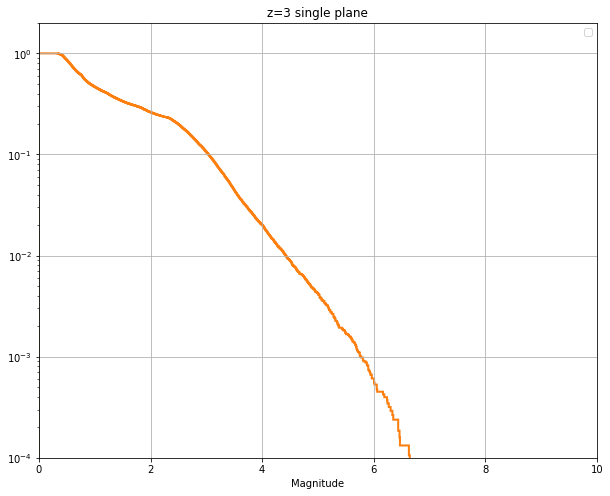

In [11]:
### Magnitude Code

import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(58081)]
muavgsq= [0 for n in range(58081)]


# print(mu)
run_num=1
n_bins = np.linspace(0, 8.0, num=1000)
print(n_bins)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('mag*.dat'):
    j=j+1

    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
    nparray=mag['mag']
    muavg=muavg+abs(nparray)
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
#     print(len(m))
    m[0]=0
    ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.1)

    
print(j)
muavg=muavg/run_num
muavgsq=muavgsq/run_num
muerr=abs(muavgsq-muavg*muavg)**0.5
sample = open('errmag.dat', 'w') 
for i in range(len(muavg)):
    print('%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf'%(mag['xs'][i], mag['ys'][i], muavg[i], muavgsq[i], muerr[i]),file=sample)

    
    nparraymu=muavg
nparraymu[nparraymu == 0] = np.nan
muavg=abs(2.5*np.log10(nparraymu))

ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2)

print(min(muavg))
plt.grid(True)
plt.axis([0, 10, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_ind_runs.png', dpi=300)

In [3]:
muerr=abs(muavgsq-muavg*muavg)**0.5
sample = open('errmag.dat', 'w') 
for i in range(len(muavg)):
    print('%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf'%(mag['xs'][i], mag['ys'][i], muavg[i], muavgsq[i], muerr[i]),file=sample)

In [39]:
pwd

'/Users/agnivaghosh/Downloads/Lensing/mag/A370l'